# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [48]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a websiteset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The websiteset

Let's start by exploring the websiteset. First load the website file:

In [49]:
website = pd.read_csv('website.csv')

In [50]:
website.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


#### Explore the website from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the websiteset.

Things you'll be looking for:

* What the websiteset looks like?
* What are the website types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [51]:
# Your code here
website.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [52]:
# Your comment here
# - The websiteset contains various features related to websites.
# - Theres a total of 1781 entries with 21 columns, with categorical and numerical website types, with some missing values notably CONTENT_LENGTH with 812 missing values and DNS_QUERY_TIMES + SERVER with 1 missing value.
# - Most of the columns contain features of the websites, such as URL_LENGTH, NUMBER_SPECIAL_CHARACTERS, CHARSET, SERVER, CONTENT_LENGTH, WHOIS_* fields.
# - The column Type appears to be the feature we will predict, where it likely stands for benign (0) vs malicious (1) websites, given the binary nature of its values.
# - Dates in WHOIS_REGDATE and WHOIS_UPDATED_DATE could be transformed into a more useful numerical representation, such as the age of the domain or the time since the last update


#### Next, evaluate if the columns in this websiteset are strongly correlated.

If our websiteset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our websiteset now.

Luckily, most of the columns in this websiteset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the website.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the websiteset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [53]:
# Your code here
from datetime import datetime

# Define a function to convert date strings to datetime objects
def parse_date(date_str):
    if date_str == 'None':
        return None
    for fmt in ('%Y-%m-%d %H:%M', '%d/%m/%Y %H:%M', '%Y-%m-%d', '%d/%m/%Y'):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return None

# Apply the function to transform WHOIS_REGDATE and WHOIS_UPDATED_DATE
website['WHOIS_REGDATE'] = website['WHOIS_REGDATE'].apply(parse_date)
website['WHOIS_UPDATED_DATE'] = website['WHOIS_UPDATED_DATE'].apply(parse_date)

# Calculate the age of the domain in days from registration date to a reference date
# Assuming the reference date is the latest date found in WHOIS_UPDATED_DATE for simplicity
reference_date = website['WHOIS_UPDATED_DATE'].max()
website['DOMAIN_AGE'] = (reference_date - website['WHOIS_REGDATE']).dt.days

# Calculate the days since last update from WHOIS_UPDATED_DATE to the reference date
website['DAYS_SINCE_UPDATE'] = (reference_date - website['WHOIS_UPDATED_DATE']).dt.days

# Display the transformed dataset with new columns
website[['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE', 'DOMAIN_AGE', 'DAYS_SINCE_UPDATE']].head()




,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DOMAIN_AGE,DAYS_SINCE_UPDATE
0,2015-10-10 18:21:00,NaT,566.0,NaN
1,NaT,NaT,NaN,NaN
2,NaT,NaT,NaN,NaN
3,1997-10-07 04:00:00,2013-09-12 00:45:00,7143.0,1324.0
4,1996-05-12 00:00:00,2017-04-11 00:00:00,7657.0,18.0


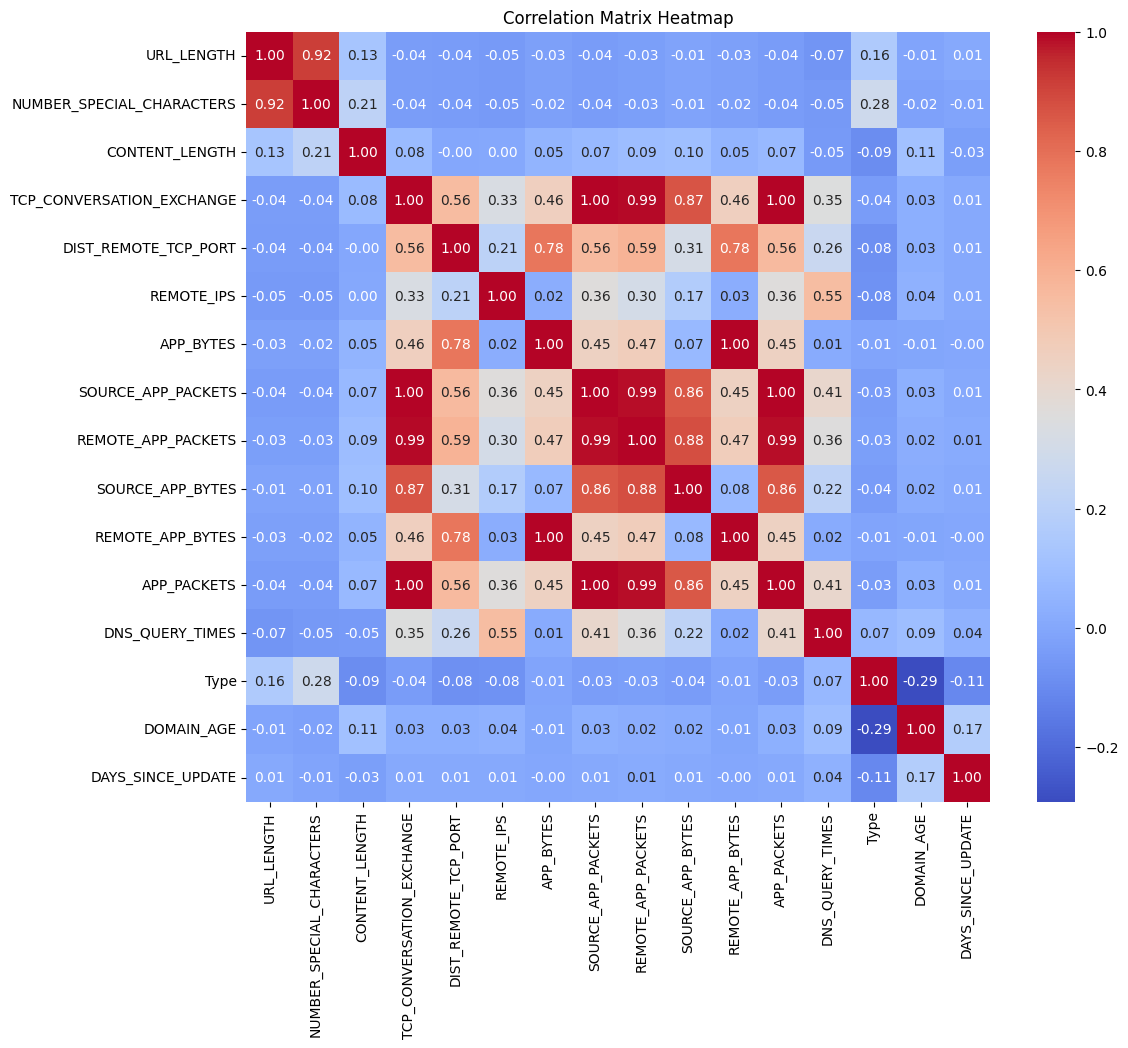

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation analysis
numeric_cols = website.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = website[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [55]:
# Your comment here
# APP_BYTES and REMOTE_APP_BYTES: These columns show a high degree of correlation, indicating that the amount of data from the application (APP_BYTES) is closely mirrored by the amount of data received by the remote application (REMOTE_APP_BYTES). One of these could potentially be removed without losing significant information.
# TCP_CONVERSATION_EXCHANGE: This column shows strong correlation with both APP_PACKETS and the SOURCE_APP_PACKETS, removing them could simplify the model without sacrificing key information.


# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the websiteset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the websiteset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the websiteset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

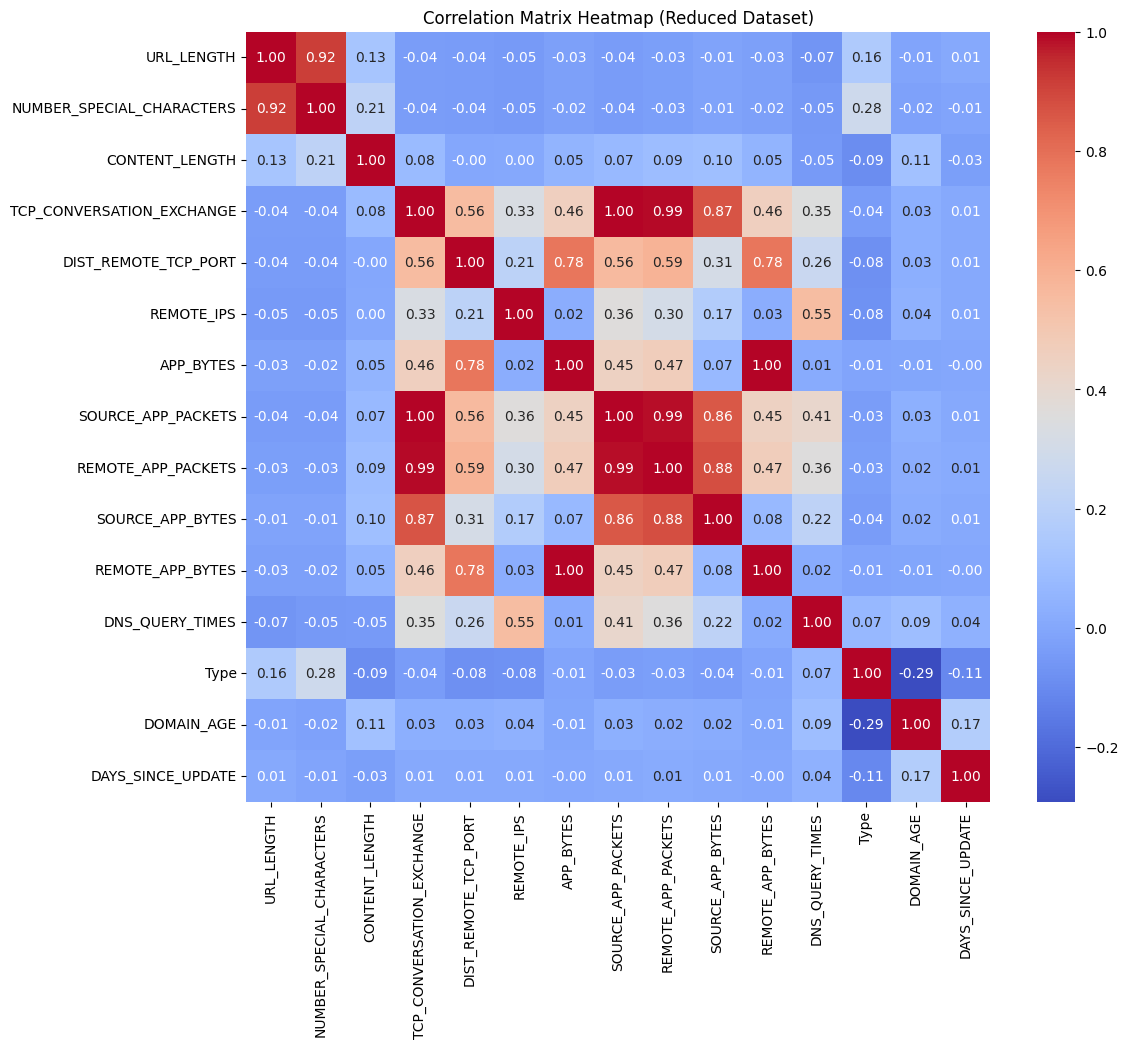

In [56]:
# Your code here
# Initial columns to consider for removal based on the heatmap and the goal to minimize removals
# Start by removing one column with the highest number of high correlations

# Removing 'APP_PACKETS' as it is highly correlated with multiple columns
data_reduced = website.drop(columns=['APP_PACKETS'])

# Recalculate correlation matrix for the reduced dataset
correlation_matrix_reduced = data_reduced.select_dtypes(include=['int64', 'float64']).corr()

# Plot heatmap for the reduced dataset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Reduced Dataset)')
plt.show()


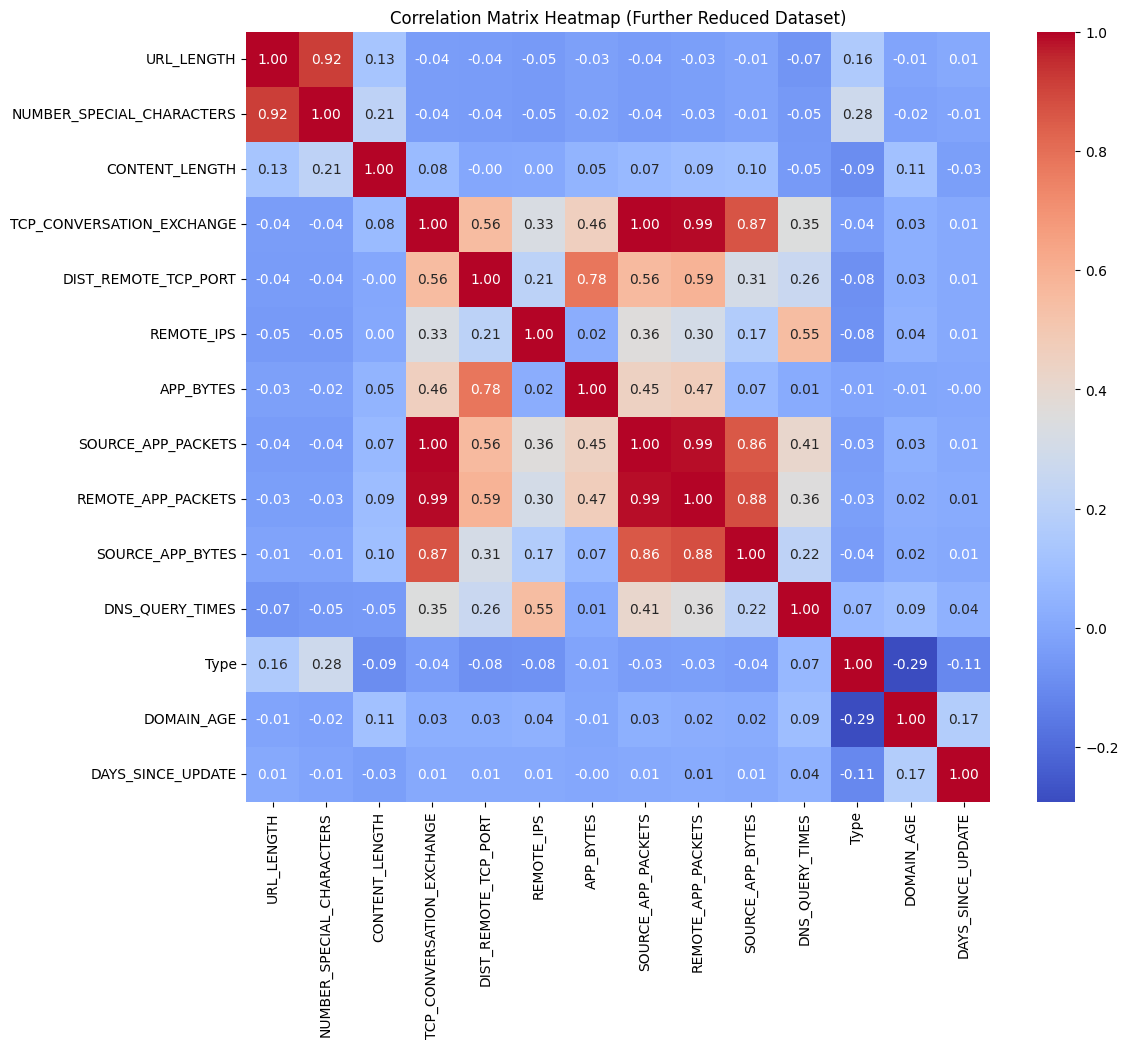

In [57]:
# Remove 'REMOTE_APP_BYTES' due to its high correlation with 'APP_BYTES'
data_reduced = data_reduced.drop(columns=['REMOTE_APP_BYTES'])
correlation_matrix_further_reduced = data_reduced.select_dtypes(include=['int64', 'float64']).corr()

# Plot heatmap for the further reduced dataset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_further_reduced, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Further Reduced Dataset)')
plt.show()

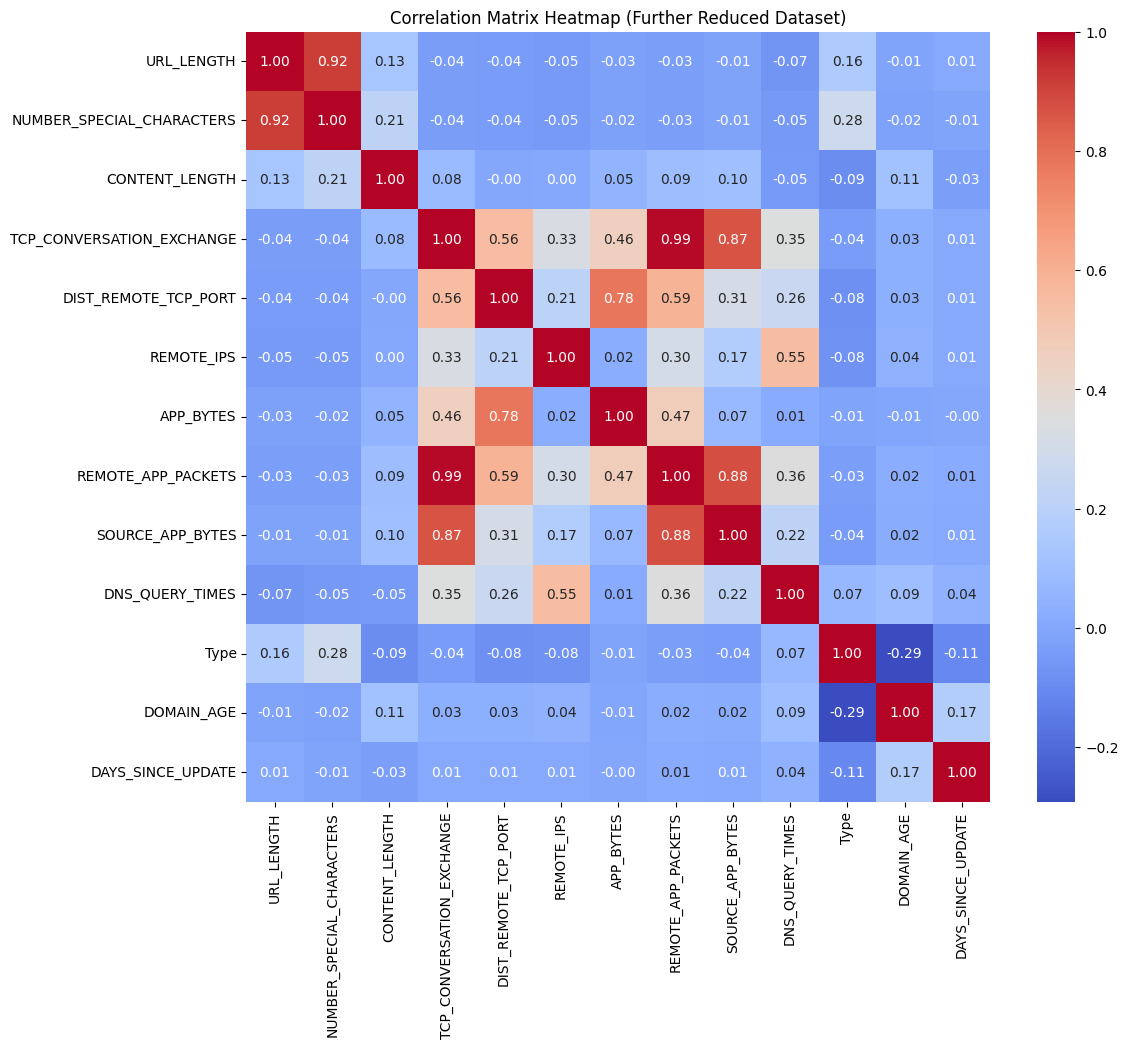

In [58]:
data_reduced = data_reduced.drop(columns=['SOURCE_APP_PACKETS'])
correlation_matrix_further_reduced = data_reduced.select_dtypes(include=['int64', 'float64']).corr()

# Plot heatmap for the further reduced dataset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_further_reduced, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Further Reduced Dataset)')
plt.show()

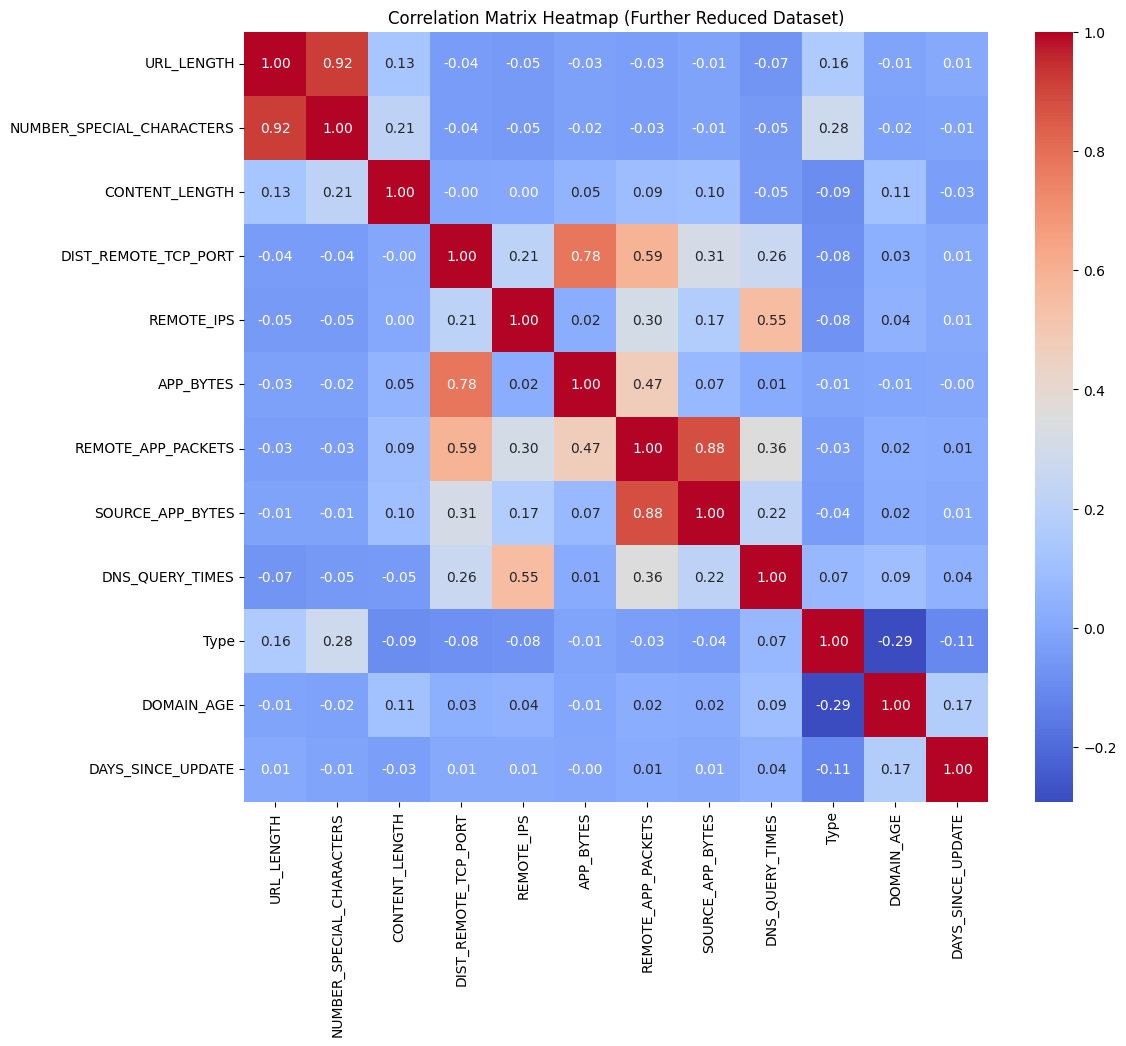

In [59]:
data_reduced = data_reduced.drop(columns=['TCP_CONVERSATION_EXCHANGE'])
correlation_matrix_further_reduced = data_reduced.select_dtypes(include=['int64', 'float64']).corr()

# Plot heatmap for the further reduced dataset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_further_reduced, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Further Reduced Dataset)')
plt.show()

In [60]:
# Your comment here
# With the removal of APP_PACKETS, REMOTE_APP_BYTES, SOURCE_APP_PACKETS and TCP_CONVERSATION_EXCHANGE the updated heatmap of the further reduced dataset now shows significantly lower levels of collinearity among the remaining columns.

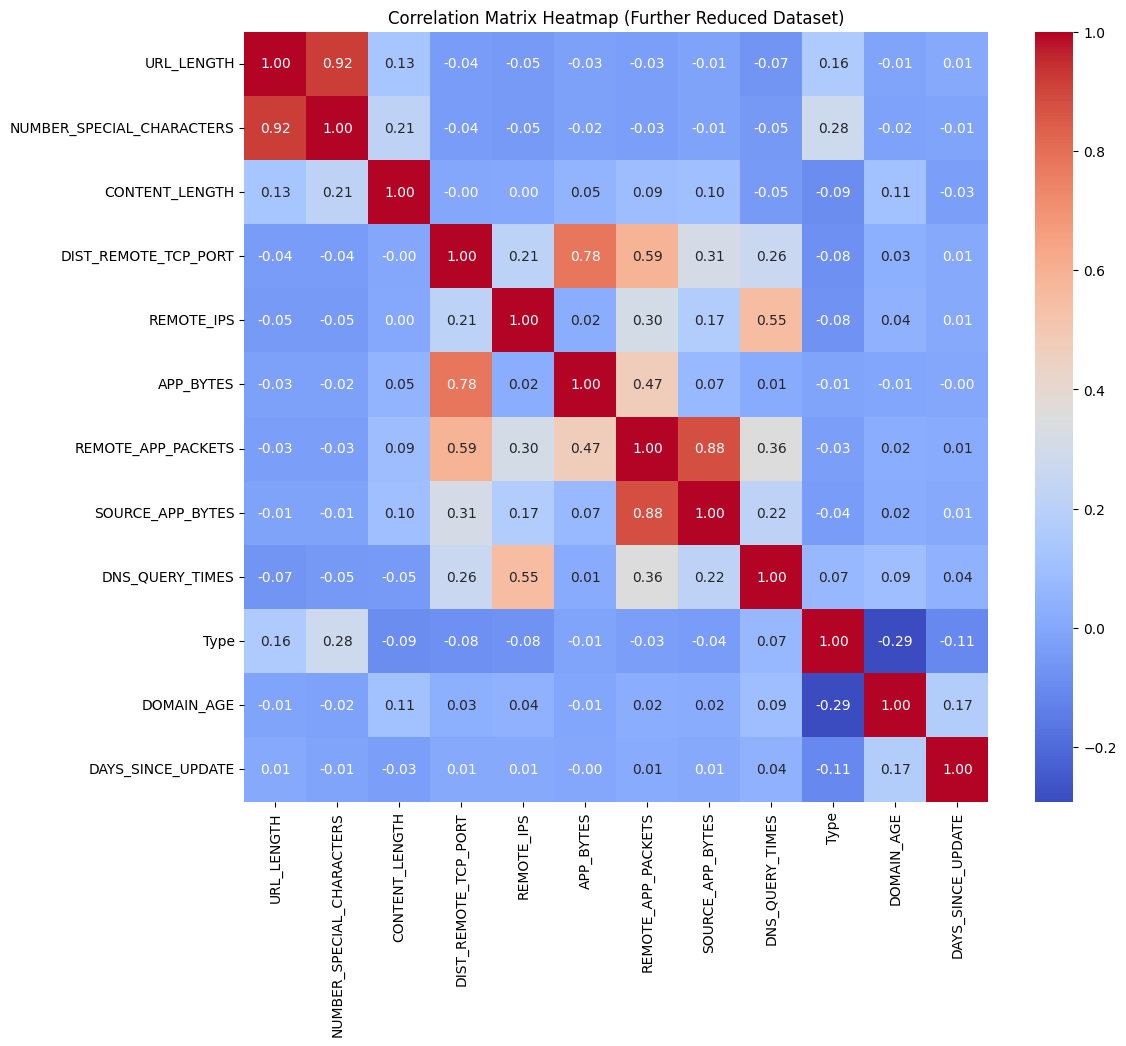

In [61]:
# Print heatmap again
# Plot heatmap for the further reduced dataset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_further_reduced, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Further Reduced Dataset)')
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [62]:
# Your code here
missing_values = website.isnull().sum()
print(missing_values)

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                135
WHOIS_UPDATED_DATE           144
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
DOMAIN_AGE                   135
DAYS_SINCE_UPDATE            144
dtype: int64


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the websiteset. Remember to comment the rationale of your decisions.

In [63]:
# Your code here
website.drop(columns=['CONTENT_LENGTH',"WHOIS_REGDATE","WHOIS_UPDATED_DATE"],inplace=True)

In [64]:
# Your comment here

#### Again, examine the number of missing values in each column.

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [65]:
# Examine missing values in each column
missing_values = website.isnull().sum()
missing_values

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
DOMAIN_AGE                   135
DAYS_SINCE_UPDATE            144
dtype: int64

In [66]:
# Dropping rows with any remaining missing values
website = data_reduced.dropna()

# Verify the operation by checking for missing values again
website.isnull().sum()



URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
DOMAIN_AGE                   0
DAYS_SINCE_UPDATE            0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical website

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [67]:
# Your code here
website['WHOIS_COUNTRY'].unique()

array(['US', 'GB', 'None', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN', 'UG',
       'JP', 'SI', 'IL', 'AT', 'CN', 'BE', 'NO', 'TR', 'KY', 'SC', 'NL',
       'FR', 'CZ', 'KR', 'UA', 'CH', 'HK', 'DE', 'IT', 'BS', 'SE',
       'Cyprus', 'us', 'BY', 'AE', 'IE', 'PH', 'UY'], dtype=object)

In [68]:
website['WHOIS_COUNTRY'] = website['WHOIS_COUNTRY'].replace({
    'us': 'US',
    'se': 'SE',
    "[u'GB'; u'UK']": 'GB',
    'United Kingdom': 'GB',
    'Cyprus': 'CY',
    'ru': 'RU'})

website['WHOIS_COUNTRY'].unique()

<ipython-input-68-637d1d8463ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  website['WHOIS_COUNTRY'] = website['WHOIS_COUNTRY'].replace({


array(['US', 'GB', 'None', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'UG',
       'JP', 'SI', 'IL', 'AT', 'CN', 'BE', 'NO', 'TR', 'KY', 'SC', 'NL',
       'FR', 'CZ', 'KR', 'UA', 'CH', 'HK', 'DE', 'IT', 'BS', 'CY', 'BY',
       'AE', 'IE', 'PH', 'UY'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of website, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

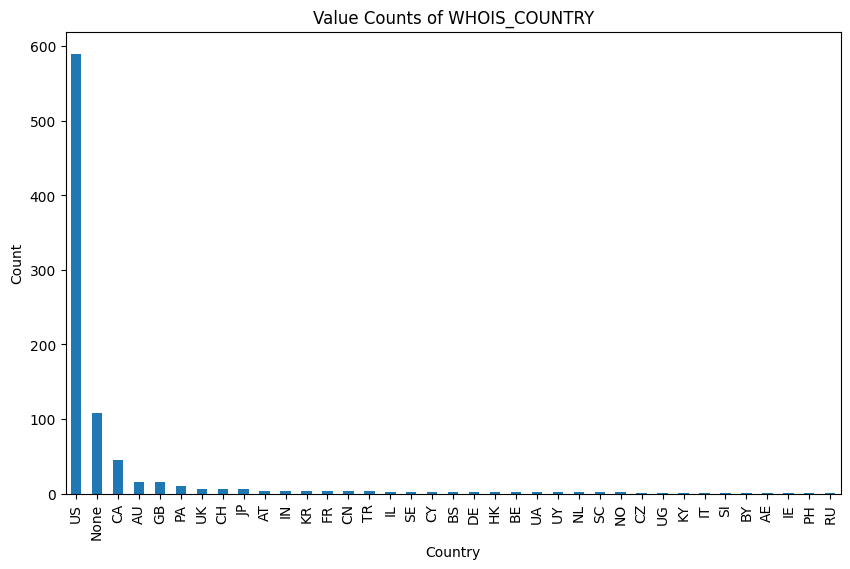

In [69]:
# Your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
website['WHOIS_COUNTRY'].value_counts().plot(kind='bar')
plt.title('Value Counts of WHOIS_COUNTRY')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [70]:
# Your code here
top_10_countries = website['WHOIS_COUNTRY'].value_counts().head(10).index
top_10_countries

Index(['US', 'None', 'CA', 'AU', 'GB', 'PA', 'UK', 'CH', 'JP', 'AT'], dtype='object')

In [93]:
website['WHOIS_COUNTRY'] = website['WHOIS_COUNTRY'].apply(lambda x: "OTHER" if x not in top_10_countries else x)

<ipython-input-93-fc196e08bda9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  website['WHOIS_COUNTRY'] = website['WHOIS_COUNTRY'].apply(lambda x: "OTHER" if x not in top_10_countries else x)


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [71]:
# Your code here
website.drop(columns = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', "WHOIS_UPDATED_DATE"], inplace=True)

# Challenge 5 - Handle Remaining Categorical website & Convert to Ordinal

Now print the `dtypes` of the website again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [94]:
# Your code here
website.drop(columns='WHOIS_COUNTRY').dtypes

<ipython-input-94-6d19e5380b97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  website.drop(columns = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', "WHOIS_UPDATED_DATE"], inplace=True)


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [73]:
# Your code here
website.drop(columns='URL', inplace=True)
website.head()

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [74]:
# Your code here
website['CHARSET'].value_counts()

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [75]:
# Your code here
website['SERVER'].value_counts()

![Think Hard](../images/think-hard.jpg)

In [76]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [77]:
# Your code here
for idx, value in enumerate(website['SERVER']):
    
    if 'Apache' in str(value):
        website.at[idx, 'SERVER'] = 'Apache'
   
    elif 'nginx' in str(value):
        website.at[idx, 'SERVER'] = 'nginx'
    elif '-nginx' in str(value):
        website.at[idx, 'SERVER'] = 'nginx'
    
    elif 'Microsoft' in str(value):
        website.at[idx, 'SERVER'] = 'Microsoft'
    elif 'Microsoft-' in str(value):
        website.at[idx, 'SERVER'] = 'Microsoft'
    
    else:
        website.at[idx, 'SERVER'] = 'Other'

In [78]:
# Count `SERVER` value counts here
website['SERVER'].value_counts()
website.dropna(inplace=True)

OK, all our categorical website are fixed now. **Let's convert them to ordinal website using Pandas' `get_dummies` function ([documentation](https://pandas.pywebsite.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the website with dummy values to a new variable `website_dummy`.**

In [79]:
# Your code here
website_dummy = pd.get_dummies(website)

Now, inspect `website_dummy` to make sure the website and types are intended - there shouldn't be any categorical columns at this point.

In [80]:
# Your code here
website_dummy.head()

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the website to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the website for training and 20% for testing.**

In [81]:
from sklearn.model_selection import train_test_split

# Your code here:
features = website_dummy.drop(columns='Type')
labels = website_dummy['Type']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [82]:
# Your code here:
from sklearn.linear_model import LogisticRegression

Next, fit the model to our training website. We have already separated our website into 4 parts. Use those in your model.

In [83]:
# Your code here:
model = LogisticRegression()
model = model.fit(X_train, y_train)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing website. Assign the fitted website to `y_pred` and print the confusion matrix as well as the accuracy score

In [84]:
# Your code here:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('accuracy score is :', accuracy_score(y_test,y_pred))
print('confusion matrix :\n', confusion_matrix(y_test,y_pred))

What are your thoughts on the performance of the model? Write your conclusions below.

In [85]:
# Your conclusions here:



#### Our second algorithm is is K-Nearest Neighbors.

Though is it not required, we will fit a model using the training website and then test the performance of the model using the testing website. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [86]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

knnr = KNeighborsClassifier(n_neighbors=3)
knnr = knnr.fit(X_train, y_train)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [87]:
# Your code here:
y_pred = knnr.predict(X_test)
print('accuracy score is :', accuracy_score(y_test,y_pred))
print('confusion matrix :\n', confusion_matrix(y_test,y_pred))

#### We'll create another K-Nearest Neighbors model with k=5.

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [88]:
# Your code here:
knnr = KNeighborsClassifier(n_neighbors=5)
knnr = knnr.fit(X_train, y_train)
y_pred = knnr.predict(X_test)
print('accuracy score is :', accuracy_score(y_test,y_pred))
print('confusion matrix :\n', confusion_matrix(y_test,y_pred))

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [89]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more website analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the website. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test website because you don't want to split the website again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed website and obtain the accuracy score in the same way. Compare the accuracy score with your normalized website with the previous accuracy website. Is there an improvement?

In [90]:
# Your code here